In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import mean, std
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()
inputShape = (28, 28, 1)
epochs = 10

Label:  2


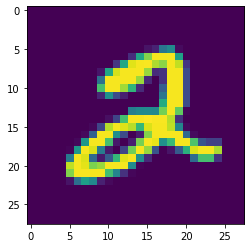

In [3]:
img = np.reshape(train_img[5], (28,28))
plt.imshow(img)
print("Label: ", train_lab[5])

In [4]:
# Loading dataset and reshapeing to have a single channel
train_img = train_img.reshape((train_img.shape[0], 28, 28, 1))
test_img  = test_img.reshape((test_img.shape[0], 28, 28, 1))
train_lab = to_categorical(train_lab)
test_lab  = to_categorical(test_lab)

# Scaling Pixels and normalizing to range 0-1
train_img = train_img.astype('float32') / 255.0
test_img  = test_img.astype('float32') / 255.0

In [5]:
print('[INFO] Building model...')
model = Sequential()
# Forming initial layers of the ConvNet to understand the features of images
model.add(Conv2D(32,
                    (3,3),
                    activation='relu',
                    padding='same',
                    input_shape=inputShape))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64,
                    (3,3),
                    activation='relu',
                    padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64,
                    (3,3),
                    activation='relu',
                    padding='same'))

# forming the dense layers in CNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

[INFO] Building model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       56        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                               

In [6]:
print("[INFO] compiling model...")
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

[INFO] compiling model...


In [7]:
# generate image data for training
train_gen = ImageDataGenerator(width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.2)
val_gen = ImageDataGenerator()

In [8]:
batchSize = 64
train_data = train_gen.flow(train_img, train_lab,
                            batch_size = batchSize, shuffle=False)
val_data = val_gen.flow(test_img, test_lab,
                             batch_size=batchSize, shuffle=False)

In [9]:
print('[INFO] fitting the model...')
history  = model.fit_generator(train_data,
                               validation_data=val_data,
                               epochs=20, verbose=1)
#model.fit(train_img, train_lab, epochs=10, batch_size=64)

[INFO] fitting the model...
Epoch 1/20


<ipython-input-9-370fd72fd8fe>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history  = model.fit_generator(train_data,


938/938 [==============================] - 27s 24ms/step - loss: 0.1870 - accuracy: 0.9405 - val_loss: 0.0773 - val_accuracy: 0.9757
Epoch 2/20
938/938 [==============================] - 18s 19ms/step - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.0543 - val_accuracy: 0.9837
Epoch 3/20
938/938 [==============================] - 18s 19ms/step - loss: 0.0547 - accuracy: 0.9830 - val_loss: 0.0316 - val_accuracy: 0.9902
Epoch 4/20
938/938 [==============================] - 19s 20ms/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0253 - val_accuracy: 0.9924
Epoch 5/20
938/938 [==============================] - 18s 19ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0349 - val_accuracy: 0.9896
Epoch 6/20
938/938 [==============================] - 18s 19ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0347 - val_accuracy: 0.9916
Epoch 7/20
938/938 [==============================] - 18s 19ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0245 - val_accuracy: 0.9927
Epo

In [10]:
test_loss, test_acc = model.evaluate(test_img, test_lab, verbose=0)
print('Test Accuracy:  %.3f' % (test_acc * 100.0))
print('Test Loss:  %.3f' % (test_loss * 100.0))

Test Accuracy:  99.450
Test Loss:  1.912


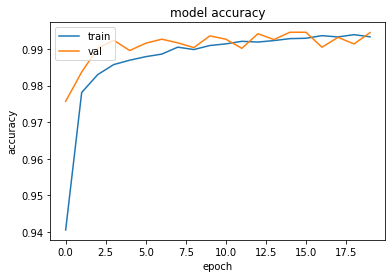

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

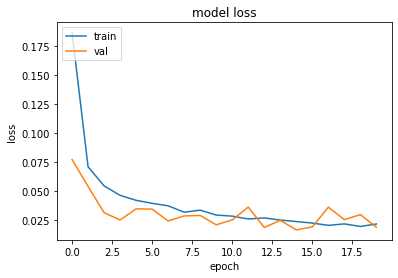

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()